In [ ]:
#installing libraries 
!pip uninstall scikit-learn
!pip install scikit-learn==0.23.2
!pip install scikit-multilearn



## EDA using Pycaret

In [ ]:
!pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()



Colab mode enabled.


In [ ]:
##important libraries 
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pycaret.nlp import *
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score

In [4]:
#Mounting drive to google colab 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
all_text = pd.read_csv('/content/gdrive/MyDrive/all_text.csv')

In [7]:
from pycaret.nlp import *
exp_name1 = setup(data = all_text, target = 'All_text')

Description,Value
session_id,573
Documents,39799
Vocab Size,28867
Custom Stopwords,False


In [9]:
lda_final = create_model('lda', num_topics = 4, multi_core = True)

In [12]:
evaluate_model(lda_final)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# Using topics made by pycaret for Classification

In [ ]:
#importing train data 

automobile_industry = pd.read_csv('dataset/train/automobile_industry.csv')
computer_industry = pd.read_csv('dataset/train/computer_industry.csv')
health_industry = pd.read_csv('dataset/train/health_industry.csv')
manufacturing_industry = pd.read_csv('dataset/train/manufacturing_industry.csv')
power_industry = pd.read_csv('dataset/train/power_industry.csv')

In [ ]:
#importing test data 

test = pd.read_csv('dataset/test/test.csv')

In [ ]:
##Making a copy of all the files to preseve the original datasets 
automobile = automobile_industry.copy(deep = True)
computer = computer_industry.copy(deep = True)
health = health_industry.copy(deep = True)
manufacturing= manufacturing_industry.copy(deep = True)
power = power_industry.copy(deep = True)
##Adding a souce column to track the industry of each dataset
automobile['source_data'] = 'automobile'
computer['source_data'] = 'computer'
health['source_data'] = 'health'
manufacturing['source_data']= 'manufacturing'
power['source_data'] = 'power'

In [ ]:
##Appending all the different industry dataset into 1 dataframe to perfrom further feature extraction and EDA
all_industry = automobile.append([computer,health,manufacturing,power])
all_industry.head()



,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,Type,Product,source_data
0,PROJ0x5377,NaN,NaN,?,Private_sector,Guatemala,Pamela Terrano,NaN,15.226766068690289,2284.014910,325.200000,The LCV concept was created as a compact truc...,Light Vehicles,Bike,automobile
1,PROJ0x24dc,NaN,NaN,small-cap,Private_sector,NaN,?,NaN,-999.0,-11230.811693,75.350000,Data movement is typically from one place in m...,Light Vehicles,AI,automobile
2,PROJ0x78e,NaN,NaN,large-cap,Public_sector,NaN,?,NaN,24.27911260914369,7283.733783,653.650000,1% share in Daimler AG.Dongfeng Motor and Niss...,Heavy Vehicles,JCP,automobile
3,PROJ0x403b,NaN,NaN,small-cap,Private_sector,NaN,?,17373.0,1.4027782279531942,35.069456,-22.246569,"Software patents, like other types of patents,...",Light Vehicles,AI,automobile
4,PROJ0x8700,NaN,NaN,mid-cap,?,Madagascar,Elizabeth Finch,NaN,3.5152032346897326,703.040647,61.400000,Data transmission has three aspects: transmiss...,Light Vehicles,AI,automobile


In [ ]:
import os
import glob
import re

# use glob to get all the csv files 
# in the folder
path = 'dataset/train/product_info/'
txt_files = glob.glob(os.path.join(path, "*.txt"))

column_names = ["Product_ID", "Product_Info"]

product_descriptions = pd.DataFrame(columns = column_names)

# loop over the list of csv files
for f in txt_files:
    regex = r"([a-zA-Z0-9]+).txt"
    matches = re.findall(regex, f, re.MULTILINE)

    if f == 'dataset/train/product_info/PROJ0x47bf.txt':
        with open(f, 'r', encoding="latin-1") as file:
            data = file.read().replace('\n', '')
            product_descriptions = product_descriptions.append({'Product_ID': [matches[0]], 'Product_Info': [data]}, ignore_index=True)
    else:
        with open(f, 'r', encoding="utf-8") as file:
            data = file.read().replace('\n', '')
            product_descriptions = product_descriptions.append({'Product_ID': matches[0], 'Product_Info': data}, ignore_index=True)

    # print the location and filename
    # print('Location:', f)
    #print('File Name:', f.split("\\")[-1])
    

In [ ]:
product_descriptions.head()

,Product_ID,Product_Info
0,PROJ0x33d9,The head is the energy per unit weight (or uni...
1,PROJ0x4ec9,75 lakh and INR 7.Australia has complex regula...
2,PROJ0x2caf,"In November 2009, Intel agreed to pay AMD $1. ..."
3,PROJ0x126f,""" The European Academies' Science Advisory Cou..."
4,PROJ0x1b8c,Early deaths due to air pollution have been es...


In [ ]:
train_data = all_industry.astype(dtype= 'str').set_index('ID').join(product_descriptions.astype(dtype='str').set_index('Product_ID'))

In [ ]:
product_descriptions[product_descriptions.Product_ID == 'PROJ0x403b' ]

,Product_ID,Product_Info
12426,PROJ0x403b,Referring to statistical significance does not...


In [ ]:
train_data.head(15)

,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,Type,Product,source_data,Product_Info
ID,,,,,,,,,,,,,,,
PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,The LCV concept was created as a compact truc...,Light Vehicles,Bike,automobile,5 million in 2019).36 mph (605.he just envisio...
PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Data movement is typically from one place in m...,Light Vehicles,AI,automobile,nan
PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,1% share in Daimler AG.Dongfeng Motor and Niss...,Heavy Vehicles,JCP,automobile,"They surged forward in the 2014 elections, rec..."
PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,"Software patents, like other types of patents,...",Light Vehicles,AI,automobile,Referring to statistical significance does not...
PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Data transmission has three aspects: transmiss...,Light Vehicles,AI,automobile,Collaborative filtering by offering movies tha...
PROJ0x5758,nan,nan,large-cap,Private_sector,nan,?,nan,?,nan,-2770.3314109673624,"In the concept, it was to have had a payload ...",Light Vehicles,Truck,automobile,"5 tonnes with a trailer up to 750 kg, and the ..."
PROJ0x86fc,nan,nan,?,nan,nan,?,7398.0,3.2939944747832675,329.39944747832675,581.85,2% stake in Toyota. These ownerships can be ex...,Light Vehicles,Truck,automobile,Campaign buses may be decorated with key campa...
PROJ0x71a5,UHL,"May,1969",large-cap,?,nan,Jerome Glaude,nan,36.536861143348105,7307.3722286696175,3444.123531722619,69% stake in Daimler AG.PSA and Toyota have a ...,Light Vehicles,Truck,automobile,The Energia launcher was designed to launch up...
PROJ0x4cc8,nan,nan,?,Public_sector,nan,Erin Miller,nan,9.835383804143635,2458.845951035909,637.2,The automotive industry began in the 1860s wit...,Heavy Vehicles,JCP,automobile,9081 NK) format has also come into use.. This ...


In [ ]:
'''all_industry.index = all_industry.index.map(str)
product_descriptions.index = product_descriptions.index.map(str)
#all_industry = all_industry['ID'].astype(dtype = 'str')
#product_descriptions.index = product_descriptions.index.astype(dtype = 'str')
train_data =  all_industry.join(product_descriptions)'''

"all_industry.index = all_industry.index.map(str)\nproduct_descriptions.index = product_descriptions.index.map(str)\n#all_industry = all_industry['ID'].astype(dtype = 'str')\n#product_descriptions.index = product_descriptions.index.astype(dtype = 'str')\ntrain_data =  all_industry.join(product_descriptions)"

In [ ]:
train_data.head()

,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,Type,Product,source_data,Product_Info
ID,,,,,,,,,,,,,,,
PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,The LCV concept was created as a compact truc...,Light Vehicles,Bike,automobile,5 million in 2019).36 mph (605.he just envisio...
PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Data movement is typically from one place in m...,Light Vehicles,AI,automobile,nan
PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,1% share in Daimler AG.Dongfeng Motor and Niss...,Heavy Vehicles,JCP,automobile,"They surged forward in the 2014 elections, rec..."
PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,"Software patents, like other types of patents,...",Light Vehicles,AI,automobile,Referring to statistical significance does not...
PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Data transmission has three aspects: transmiss...,Light Vehicles,AI,automobile,Collaborative filtering by offering movies tha...


In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
train_data['Company_background'] = train_data['Company_background'].astype(str)
train_data['Product_Info'] = train_data['Product_Info'].astype(str)
train_data['Company_background_processed'] = train_data['Company_background'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
train_data['Product_Info_processed'] = train_data['Product_Info'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
train_data['Company_background_processed'] = train_data['Company_background_processed'].map(lambda x: x.lower())
train_data['Product_Info_processed'] = train_data['Product_Info_processed'].map(lambda x: x.lower())
train_data['Company_background_processed'] = train_data['Company_background_processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
train_data['Product_Info_processed'] = train_data['Product_Info_processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
train_data['Company_background_processed'] = train_data['Company_background_processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
train_data['Product_Info_processed'] = train_data['Product_Info_processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))


In [ ]:

import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')
train_data['Company_background_processed'] = train_data['Company_background_processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
train_data['Product_Info_processed'] = train_data['Product_Info_processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))

In [ ]:
train_data.head()

,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,Type,Product,source_data,Product_Info,Company_background_processed,Product_Info_processed
ID,,,,,,,,,,,,,,,,,
PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,The LCV concept was created as a compact truc...,Light Vehicles,Bike,automobile,5 million in 2019).36 mph (605.he just envisio...,lcv concept created compact truck usually opti...,5 million 2019 36 mph 605 envisioned wanted on...
PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Data movement is typically from one place in m...,Light Vehicles,AI,automobile,nan,data movement typically one place memory anoth...,nan
PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,1% share in Daimler AG.Dongfeng Motor and Niss...,Heavy Vehicles,JCP,automobile,"They surged forward in the 2014 elections, rec...",1 share daimler ag dongfeng motor nissan 50 50...,surged forward 2014 elections receiving 7 040 ...
PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,"Software patents, like other types of patents,...",Light Vehicles,AI,automobile,Referring to statistical significance does not...,software patents like types patents theoretica...,referring statistical significance necessarily...
PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Data transmission has three aspects: transmiss...,Light Vehicles,AI,automobile,Collaborative filtering by offering movies tha...,data transmission three aspects transmission p...,collaborative filtering offering movies share ...


In [ ]:

# Lemmatize the text
nltk.download('wordnet')
lemmer = WordNetLemmatizer()

train_data['Company_background_processed'] = train_data['Company_background_processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))

train_data['Product_Info_processed'] = train_data['Product_Info_processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

#Removing Stop words again after Lemmatize
train_data['Company_background_processed']  = train_data['Company_background_processed'] .map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
train_data['Product_Info_processed']  = train_data['Product_Info_processed'] .map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:

#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [ ]:
common_words_company = get_n_words(train_data['Company_background_processed'], "top", 15)
common_words_product = get_n_words(train_data['Product_Info_processed'], "top", 15)
rare_words_company = get_n_words(train_data['Company_background_processed'], "bottom", 15)
rare_words_product = get_n_words(train_data['Product_Info_processed'], "bottom", 15)


In [ ]:
common_words_company

[('manufacturing', 4248),
 ('computer', 3952),
 ('software', 3827),
 ('technology', 3826),
 ('energy', 3801),
 ('information', 3793),
 ('data', 3230),
 ('50', 3091),
 ('world', 3067),
 ('industry', 3053),
 ('power', 2763),
 ('stake', 2744),
 ('device', 2684),
 ('hold', 2594),
 ('good', 2466)]

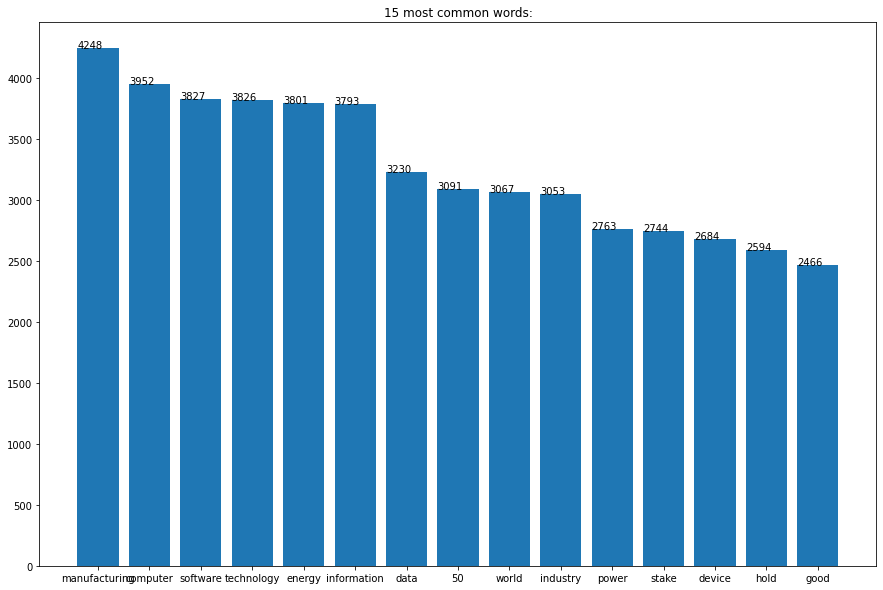

In [ ]:
common_words_company = dict(common_words_company)
names = list(common_words_company.keys())
values = list(common_words_company.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words_company)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

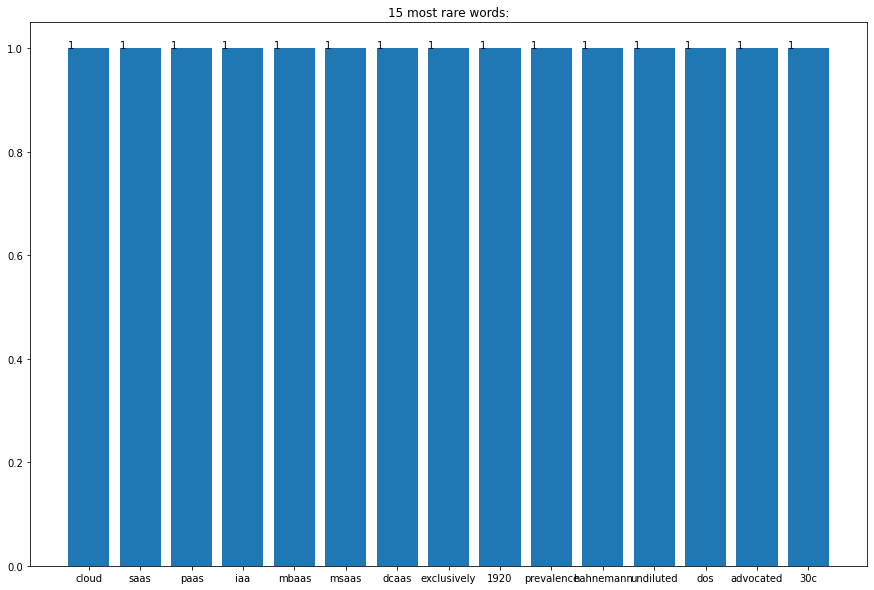

In [ ]:
rare_words_company = dict(rare_words_company)
names = list(rare_words_company.keys())
values = list(rare_words_company.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words_company)),values,tick_label=names)
plt.title('15 most rare words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [ ]:
no_features = 100
tf_vectorizer_1 = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=[1, 3])

tpl_tf_1 = tf_vectorizer_1.fit_transform(train_data['Company_background_processed'])
display("Bow-TF :", tpl_tf_1.shape)
df_tf_1= pd.DataFrame(tpl_tf_1.toarray(), columns=tf_vectorizer_1.get_feature_names())
display(df_tf_1.head())

'Bow-TF :'

(23909, 100)

,50,50 50,also,application,automobile,based,building,business,called,century,city,company,computer,concept,cost,country,data,design,developed,development,device,economy,electric,electricity,emission,energy,every,example,first,form,fuel,general,generation,good,government,green,group,health,healthcare,hold,...,modern,motor,national,new,often,one,operation,organization,owns,parma,part,power,process,product,production,program,safety,sector,security,service,software,source,stake,standard,state,storage,stored,system,technology,term,time,united,use,used,user,vehicle,venture,venture called,world,year
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
no_features = 200
tf_vectorizer_2 = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=[1, 3])

tpl_tf_2 = tf_vectorizer_2.fit_transform(train_data['Product_Info_processed'])
display("Bow-TF :", tpl_tf_2)
df_tf_2 = pd.DataFrame(tpl_tf_2.toarray(), columns=tf_vectorizer_2.get_feature_names())
display(df_tf_2.head())

'Bow-TF :'

<23909x200 sparse matrix of type '<class 'numpy.int64'>'
	with 306204 stored elements in Compressed Sparse Row format>

,000,10,19th,2018,access,air,allopathic,allopathy,also,alternative,although,amd,among,application,area,around,attack,available,based,bike,board,bus,called,capacity,car,card,cause,century,charcoal,coal,common,company,computer,considered,control,conventional,cost,could,country,cpu,...,speech,standard,state,station,still,store,study,substance,symptom,system,technology,temperature,term,thermometer,three,time,toy,treatment,truck,turbine,two,type,typically,unit,united,united state,use,used,user,using,usually,vehicle,video,water,wave,well,wind,world,would,year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tf_2.shape, df_tf_1.shape, train_data.shape


((23909, 200), (23909, 100), (23909, 17))

In [ ]:
train_data.head()

,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,Type,Product,source_data,Product_Info,Company_background_processed,Product_Info_processed
ID,,,,,,,,,,,,,,,,,
PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,The LCV concept was created as a compact truc...,Light Vehicles,Bike,automobile,5 million in 2019).36 mph (605.he just envisio...,lcv concept created compact truck usually opti...,5 million 2019 36 mph 605 envisioned wanted on...
PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Data movement is typically from one place in m...,Light Vehicles,AI,automobile,nan,data movement typically one place memory anoth...,nan
PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,1% share in Daimler AG.Dongfeng Motor and Niss...,Heavy Vehicles,JCP,automobile,"They surged forward in the 2014 elections, rec...",1 share daimler ag dongfeng motor nissan 50 50...,surged forward 2014 election receiving 7 040 1...
PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,"Software patents, like other types of patents,...",Light Vehicles,AI,automobile,Referring to statistical significance does not...,software patent like type patent theoretically...,referring statistical significance necessarily...
PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Data transmission has three aspects: transmiss...,Light Vehicles,AI,automobile,Collaborative filtering by offering movies tha...,data transmission three aspect transmission pr...,collaborative filtering offering movie share c...


In [ ]:
train_data = train_data.reset_index()

In [ ]:
train_data.head()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,Type,Product,source_data,Product_Info,Company_background_processed,Product_Info_processed
0,PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,The LCV concept was created as a compact truc...,Light Vehicles,Bike,automobile,5 million in 2019).36 mph (605.he just envisio...,lcv concept created compact truck usually opti...,5 million 2019 36 mph 605 envisioned wanted on...
1,PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Data movement is typically from one place in m...,Light Vehicles,AI,automobile,nan,data movement typically one place memory anoth...,nan
2,PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,1% share in Daimler AG.Dongfeng Motor and Niss...,Heavy Vehicles,JCP,automobile,"They surged forward in the 2014 elections, rec...",1 share daimler ag dongfeng motor nissan 50 50...,surged forward 2014 election receiving 7 040 1...
3,PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,"Software patents, like other types of patents,...",Light Vehicles,AI,automobile,Referring to statistical significance does not...,software patent like type patent theoretically...,referring statistical significance necessarily...
4,PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Data transmission has three aspects: transmiss...,Light Vehicles,AI,automobile,Collaborative filtering by offering movies tha...,data transmission three aspect transmission pr...,collaborative filtering offering movie share c...


In [ ]:
df_tf_2.head()

,000,10,19th,2018,access,air,allopathic,allopathy,also,alternative,although,amd,among,application,area,around,attack,available,based,bike,board,bus,called,capacity,car,card,cause,century,charcoal,coal,common,company,computer,considered,control,conventional,cost,could,country,cpu,...,speech,standard,state,station,still,store,study,substance,symptom,system,technology,temperature,term,thermometer,three,time,toy,treatment,truck,turbine,two,type,typically,unit,united,united state,use,used,user,using,usually,vehicle,video,water,wave,well,wind,world,would,year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
all_extraced_text = pd.concat([df_tf_1, df_tf_2], axis = 1).drop_duplicates().reset_index(drop=True)

In [ ]:
all_extraced_text.shape

(23907, 300)

In [ ]:
train_data_v1 = train_data.drop(columns=['Company_background_processed', 'Company_background','Product_Info','Product_Info_processed'])

In [ ]:
train_text_mod = pd.read_csv('drive')

In [ ]:
train_text_mod = pd.concat([train_data_v1, all_extraced_text], axis = 1).drop_duplicates().reset_index(drop=True)

In [ ]:
train_text_mod.tail()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Type,Product,source_data,50,50 50,also,application,automobile,based,building,business,called,century,city,company,computer,concept,cost,country,data,design,developed,development,device,economy,electric,electricity,emission,energy,...,speech,standard,state,station,still,store,study,substance,symptom,system,technology,temperature,term,thermometer,three,time,toy,treatment,truck,turbine,two,type,typically,unit,united,united state,use,used,user,using,usually,vehicle,video,water,wave,well,wind,world,would,year
23904,PROJ0x7bb7,nan,"April,1960",?,?,nan,Ivory Perry,nan,13.213459723211047,nan,309.7,green energy,Hydro,power,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23905,PROJ0x70a7,nan,nan,large-cap,?,nan,?,nan,-999.0,nan,-4718.551728074415,green energy,Wind,power,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23906,PROJ0x8488,nan,nan,?,Public_sector,nan,?,nan,12.891043524047364,nan,-4423.26380540959,non green energy,charcoal,power,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23907,PROJ0x613e,nan,nan,?,nan,nan,?,14514.0,2.180258593590086,218.02585935900856,nan,green energy,Wind,power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23908,PROJ0x7484,nan,nan,?,Public_sector,nan,?,nan,6.6455626873362,9568.26258169192,7498.564150828278,non green energy,charcoal,power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#print(list(train_text_mod_2.columns))

In [ ]:
train_data.head()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,Type,Product,source_data,Product_Info,Company_background_processed,Product_Info_processed
0,PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,The LCV concept was created as a compact truc...,Light Vehicles,Bike,automobile,5 million in 2019).36 mph (605.he just envisio...,lcv concept created compact truck usually opti...,5 million 2019 36 mph 605 envisioned wanted on...
1,PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Data movement is typically from one place in m...,Light Vehicles,AI,automobile,nan,data movement typically one place memory anoth...,nan
2,PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,1% share in Daimler AG.Dongfeng Motor and Niss...,Heavy Vehicles,JCP,automobile,"They surged forward in the 2014 elections, rec...",1 share daimler ag dongfeng motor nissan 50 50...,surged forward 2014 election receiving 7 040 1...
3,PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,"Software patents, like other types of patents,...",Light Vehicles,AI,automobile,Referring to statistical significance does not...,software patent like type patent theoretically...,referring statistical significance necessarily...
4,PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Data transmission has three aspects: transmiss...,Light Vehicles,AI,automobile,Collaborative filtering by offering movies tha...,data transmission three aspect transmission pr...,collaborative filtering offering movie share c...


In [ ]:

#Removing year variables
#train_text_mod_2 = train_text_mod.drop(['000','10','100','11','12','15','16','18','1980s','19th','19th century','20','2004','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','25','30','40','50','60','000 lb', '50 50', '50 50 joint', '50 50 stake', '50 joint', '50 joint venture', '50 stake'],axis =1 )

In [ ]:
train_text_mod.head()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Type,Product,source_data,50,50 50,also,application,automobile,based,building,business,called,century,city,company,computer,concept,cost,country,data,design,developed,development,device,economy,electric,electricity,emission,energy,...,speech,standard,state,station,still,store,study,substance,symptom,system,technology,temperature,term,thermometer,three,time,toy,treatment,truck,turbine,two,type,typically,unit,united,united state,use,used,user,using,usually,vehicle,video,water,wave,well,wind,world,would,year
0,PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,Light Vehicles,Bike,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Light Vehicles,AI,automobile,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,Heavy Vehicles,JCP,automobile,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,Light Vehicles,AI,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Light Vehicles,AI,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Removing duplicates
train_text_mod = train_text_mod.loc[:,~train_text_mod.columns.duplicated()]
train_text_mod.shape

(23909, 247)

In [ ]:
#Further dropping columns that does not make sense 
train_text_mod_2 = train_text_mod.drop(['50','50 50','also','application','based','business', 'called','century','city', 'company','concept','cost','country','developed','development','developed',
 'development','every',
 'example',
 'first',
 'form','general',
 'generation',
 'good','group','hold','include','industry','joint',
 'joint venture',
 'joint venture called','many', 'may', 'national',
 'new',
 'often',
 'one',
 'operation',
 'organization',
 'owns', 'sector','use',
 'used','world',
 'year',
 '000',
 '10',
 '19th',
 '2018',
'also',
 'alternative',
 'although','among','application',
 'area',
 'around','available',
 'based', 'cause',
 'century','common',
 'company','considered', 'could',
 'country','different','evidence',
 'example','first','general',
 'generally',
 'generation','high',
 'higher','however','include',
 'including','known','larry',
 'law',
 'le',
 'learning',
 'level',
 'like','made',
 'make',
 'many',
 'market','may', 'much',
 'name', 'much',
 'name','several',
 'similar',
 'since',
 'single','two','united state',
 'use',
 'used',
 'user'],axis =1 )

In [ ]:
#manually removing unimportant columns
train_text_mod_4 = train_text_mod_2.drop([
 'large',
 'low',
 'process',
 'product',
 'program',
 'source',
 'stake',
 'standard',
 'state',
 'stored',
 'term',
 'time',
 'united',
 'venture',
 'venture called',
 'access',
 'due',
 'early',
 'effect',
 'found',
 'increase',
 'india',
 'indian',
 'long',
 'non',
 'number',
 'per',
 'point',
 'practice',
 'region',
 'result',
  'small',
 'sometimes',
 'station',
 'still',
 'study',
 'substance',
 'three',
 'typically',
 'unit',
 'using',
 'usually',
 'well',
 'would'],axis =1) 

In [ ]:
train_text_mod_2.shape
#list(train_text_mod.columns)

(23909, 164)

In [ ]:
train_text_mod_4.shape

(23909, 120)

In [ ]:
train_text_mod_2.tail()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Type,Product,source_data,automobile,building,computer,data,design,device,economy,electric,electricity,emission,energy,fuel,government,green,health,healthcare,human,industrial,information,information technology,large,low,machine,manufacturer,manufacturing,material,...,practice,processing,processor,produce,produced,public,range,region,research,result,risk,science,small,solar,sometimes,speech,station,still,store,study,substance,symptom,temperature,thermometer,three,toy,treatment,truck,turbine,type,typically,unit,using,usually,video,water,wave,well,wind,would
23904,PROJ0x7bb7,nan,"April,1960",?,?,nan,Ivory Perry,nan,13.213459723211047,nan,309.7,green energy,Hydro,power,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23905,PROJ0x70a7,nan,nan,large-cap,?,nan,?,nan,-999.0,nan,-4718.551728074415,green energy,Wind,power,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23906,PROJ0x8488,nan,nan,?,Public_sector,nan,?,nan,12.891043524047364,nan,-4423.26380540959,non green energy,charcoal,power,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23907,PROJ0x613e,nan,nan,?,nan,nan,?,14514.0,2.180258593590086,218.02585935900856,nan,green energy,Wind,power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23908,PROJ0x7484,nan,nan,?,Public_sector,nan,?,nan,6.6455626873362,9568.26258169192,7498.564150828278,non green energy,charcoal,power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_text_mod_2['source_data'].unique()

array(['automobile', 'computer', 'health', 'manufacturing', 'power'],
      dtype=object)

In [ ]:
train_text_mod_3 = train_text_mod_2.copy(deep =True)

In [ ]:
import numpy as np
import pandas as pd 
cols = ['Type', 'Product', 'source_data']
train_text_mod_4['combined'] = train_text_mod_4[cols].apply(lambda row: '_'.join(row.values.astype(str)),axis =1 )

In [ ]:
train_text_mod_4['combined'].value_counts()

green energy_Solar_power           1004
non green energy_charcoal_power     945
non green energy_Fuel_power         944
green energy_Hydro_power            940
Light Vehicles_Bike_automobile      879
                                   ... 
nan_antivirus-security_computer       1
nan_Fastfood_manufacturing            1
nan_AI_computer                       1
nan_Fuel_power                        1
Heavy vehicle_Truck_automobile        1
Name: combined, Length: 76, dtype: int64

In [ ]:
train_text_mod_4.head()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Type,Product,source_data,automobile,building,computer,data,design,device,economy,electric,electricity,emission,energy,fuel,government,green,health,healthcare,human,industrial,information,information technology,machine,manufacturer,manufacturing,material,medical,medical device,...,homeopath,homeopathic,homeopathy,hydrogen,internet,medicine,method,million,model,motorcycle,natural,network,oil,organic,plant,processing,processor,produce,produced,public,range,research,risk,science,solar,speech,store,symptom,temperature,thermometer,toy,treatment,truck,turbine,type,video,water,wave,wind,combined
0,PROJ0x5377,nan,nan,?,Private_sector,Guatemala,Pamela Terrano,nan,15.226766068690289,2284.0149103035433,325.2,Light Vehicles,Bike,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_Bike_automobile
1,PROJ0x24dc,nan,nan,small-cap,Private_sector,nan,?,nan,-999.0,-11230.811693363396,75.35,Light Vehicles,AI,automobile,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_AI_automobile
2,PROJ0x78e,nan,nan,large-cap,Public_sector,nan,?,nan,24.27911260914369,7283.733782743108,653.65,Heavy Vehicles,JCP,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Heavy Vehicles_JCP_automobile
3,PROJ0x403b,nan,nan,small-cap,Private_sector,nan,?,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,Light Vehicles,AI,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_AI_automobile
4,PROJ0x8700,nan,nan,mid-cap,?,Madagascar,Elizabeth Finch,nan,3.5152032346897326,703.0406469379466,61.4,Light Vehicles,AI,automobile,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_AI_automobile


In [ ]:
train_text_mod_4.drop(['Type','Product', 'CEO','No.of employee','Revenue (Cr)','Net-valuation (Cr)','Share_price (RS)','Symbol','Start_date','market_cap','Sector','Country'], axis =1 , inplace = True)

In [ ]:
train_text_mod_4.head()

,ID,source_data,automobile,building,computer,data,design,device,economy,electric,electricity,emission,energy,fuel,government,green,health,healthcare,human,industrial,information,information technology,machine,manufacturer,manufacturing,material,medical,medical device,modern,motor,parma,part,power,production,safety,security,service,software,storage,system,...,homeopath,homeopathic,homeopathy,hydrogen,internet,medicine,method,million,model,motorcycle,natural,network,oil,organic,plant,processing,processor,produce,produced,public,range,research,risk,science,solar,speech,store,symptom,temperature,thermometer,toy,treatment,truck,turbine,type,video,water,wave,wind,combined
0,PROJ0x5377,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_Bike_automobile
1,PROJ0x24dc,automobile,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_AI_automobile
2,PROJ0x78e,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Heavy Vehicles_JCP_automobile
3,PROJ0x403b,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_AI_automobile
4,PROJ0x8700,automobile,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Light Vehicles_AI_automobile


In [ ]:
train_text_mod_3.tail()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Type,Product,source_data,automobile,building,computer,data,design,device,economy,electric,electricity,emission,energy,fuel,government,green,health,healthcare,human,industrial,information,information technology,large,low,machine,manufacturer,manufacturing,material,...,processing,processor,produce,produced,public,range,region,research,result,risk,science,small,solar,sometimes,speech,station,still,store,study,substance,symptom,temperature,thermometer,three,toy,treatment,truck,turbine,type,typically,unit,using,usually,video,water,wave,well,wind,would,combined
23904,PROJ0x7bb7,nan,"April,1960",?,?,nan,Ivory Perry,nan,13.213459723211047,nan,309.7,green energy,Hydro,power,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,green energy_Hydro_power
23905,PROJ0x70a7,nan,nan,large-cap,?,nan,?,nan,-999.0,nan,-4718.551728074415,green energy,Wind,power,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,green energy_Wind_power
23906,PROJ0x8488,nan,nan,?,Public_sector,nan,?,nan,12.891043524047364,nan,-4423.26380540959,non green energy,charcoal,power,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,non green energy_charcoal_power
23907,PROJ0x613e,nan,nan,?,nan,nan,?,14514.0,2.180258593590086,218.02585935900856,nan,green energy,Wind,power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,green energy_Wind_power
23908,PROJ0x7484,nan,nan,?,Public_sector,nan,?,nan,6.6455626873362,9568.26258169192,7498.564150828278,non green energy,charcoal,power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non green energy_charcoal_power


In [ ]:
train_text_mod_4.fillna(0, inplace= True)

In [ ]:

from pycaret.classification import *
try_1 = setup(data = train_text_mod_4, target = 'source_data', session_id = 420)


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:35:46
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
ID,Categorical
automobile,Numeric
building,Numeric
computer,Numeric
data,Numeric
...,...
water,Numeric
wave,Numeric
wind,Numeric
combined,Categorical


In [ ]:
y_industry.head()

In [ ]:
automobile_mod = train_text_mod_2[train_text_mod_2['source_data'] == 'automobile']
computer_mod = train_text_mod_2[train_text_mod_2['source_data'] == 'computer']
health_mod = train_text_mod_2[train_text_mod_2['source_data'] == 'health']
manufacturing_mod = train_text_mod_2[train_text_mod_2['source_data'] == 'manufacturing']
power_mod = train_text_mod_2[train_text_mod_2['source_data'] == 'power']

In [ ]:
#Removing columns that are all 0s 
automobile_mod = automobile_mod.loc[:, (automobile_mod != 0).any(axis=0)]
computer_mod = computer_mod.loc[:, (computer_mod != 0).any(axis=0)]
health_mod = health_mod.loc[:, (health_mod != 0).any(axis=0)]
manufacturing_mod = manufacturing_mod.loc[:, (manufacturing_mod != 0).any(axis=0)]
power_mod = power_mod.loc[:, (power_mod != 0).any(axis=0)]

In [ ]:
automobile_mod.shape, computer_mod.shape, health_mod.shape, power_mod.shape,manufacturing_mod.shape

((4807, 143), (4828, 131), (4698, 140), (4739, 164), (4837, 154))

In [ ]:
automobile_mod.head()
automobile_mod.replace({'market_cap': {'?': np.nan}}, regex=False,inplace=True)
automobile_mod.replace({'Sector': {'?': np.nan}}, regex=False,inplace=True)
automobile_mod.replace({'CEO': {'?': np.nan}}, regex=False,inplace=True)
automobile_mod.replace({'Symbol': {'nan': np.nan}}, regex=False,inplace=True)
automobile_mod.replace({'Start_date': {'nan': np.nan}}, regex=False,inplace=True)
automobile_mod.replace({'Country': {'nan': np.nan}}, regex=False,inplace=True)
automobile_mod.replace({'No.of employee': {'nan': np.nan}}, regex=False,inplace=True)

In [ ]:
automobile_mod.head()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Type,Product,source_data,automobile,computer,data,design,device,economy,fuel,government,healthcare,human,industrial,information,information technology,large,low,machine,manufacturer,manufacturing,material,modern,motor,part,power,process,product,production,...,plant,point,practice,processing,processor,produce,produced,public,range,region,research,result,risk,science,small,solar,sometimes,speech,station,still,store,study,substance,symptom,temperature,three,toy,treatment,truck,type,typically,unit,using,usually,video,water,wave,well,wind,would
0,PROJ0x5377,NaN,NaN,NaN,Private_sector,Guatemala,Pamela Terrano,NaN,15.226766068690289,2284.0149103035433,325.2,Light Vehicles,Bike,automobile,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,PROJ0x24dc,NaN,NaN,small-cap,Private_sector,NaN,NaN,NaN,-999.0,-11230.811693363396,75.35,Light Vehicles,AI,automobile,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PROJ0x78e,NaN,NaN,large-cap,Public_sector,NaN,NaN,NaN,24.27911260914369,7283.733782743108,653.65,Heavy Vehicles,JCP,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,PROJ0x403b,NaN,NaN,small-cap,Private_sector,NaN,NaN,17373.0,1.4027782279531942,35.069455698829856,-22.246569111376857,Light Vehicles,AI,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PROJ0x8700,NaN,NaN,mid-cap,NaN,Madagascar,Elizabeth Finch,NaN,3.5152032346897326,703.0406469379466,61.4,Light Vehicles,AI,automobile,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Checking null values 
automobile_mod.isnull().sum()

ID               0
Symbol        3475
Start_date    3044
market_cap    2418
Sector        1893
              ... 
water            0
wave             0
well             0
wind             0
would            0
Length: 143, dtype: int64

In [ ]:
#Removing all columns with null values - high percentage nulls 
automobile_mod.drop(['Symbol','Start_date','market_cap','Sector','Country'], axis =1 , inplace = True)


In [ ]:
automobile_mod.drop(['CEO','No.of employee','Revenue (Cr)','Net-valuation (Cr)','Share_price (RS)','source_data'], axis =1 , inplace = True)

In [ ]:
automobile_mod.head()

,ID,Type,Product,automobile,computer,data,design,device,economy,fuel,government,healthcare,human,industrial,information,information technology,large,low,machine,manufacturer,manufacturing,material,modern,motor,part,power,process,product,production,program,safety,security,service,software,source,stake,standard,state,storage,stored,...,plant,point,practice,processing,processor,produce,produced,public,range,region,research,result,risk,science,small,solar,sometimes,speech,station,still,store,study,substance,symptom,temperature,three,toy,treatment,truck,type,typically,unit,using,usually,video,water,wave,well,wind,would
0,PROJ0x5377,Light Vehicles,Bike,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,PROJ0x24dc,Light Vehicles,AI,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PROJ0x78e,Heavy Vehicles,JCP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,PROJ0x403b,Light Vehicles,AI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PROJ0x8700,Light Vehicles,AI,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from pycaret.classification import * 

In [ ]:
y_auto = automobile_mod.loc[:,['Type', 'Product']]
X_auto = automobile_mod.drop(['Type', 'Product','ID'], axis = 1)


In [ ]:
test.head()

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background
0,PROJ0x51fa,NaN,NaN,?,NaN,NaN,Vicenta Bronstein,NaN,0.6836318142997198,8507.104743,65.800000,The food processing industry is one of the lar...
1,PROJ0x3c88,NaN,NaN,large-cap,?,NaN,Nelson Bodkin,7964.0,?,NaN,1617.536129,Well-designed government policies that promote...
2,PROJ0x3e72,NaN,NaN,mid-cap,?,NaN,?,NaN,2.519536393657552,755.860918,755.400000,Information services Information services is ...
3,PROJ0x1129,NaN,"August,1979",small-cap,NaN,NaN,?,NaN,-999.0,155.498484,94.700000,Not available
4,PROJ0x9029,NaN,NaN,small-cap,Private_sector,NaN,?,6954.0,?,34880.360760,NaN,"In 2007, there were about 806 million cars and..."


In [ ]:

#from sklearn.impute import SimpleImputer
#exp_mclf101 = setup(data = automobile_mod, target = 'Type', session_id=123, imputation_type='iterative')

,Description,Value
0,session_id,123
1,Target,Type
2,Target Type,Multiclass
3,Label Encoded,"Heavy Vehicles: 0, Heavy vehicle: 1, Light Veh..."
4,Original Data,"(4807, 132)"
5,Missing Values,False
6,Numeric Features,105
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
exp_mclf102 = setup(data = automobile_mod, target = 'Product', session_id=123, imputation_type='iterative',ignore_features= ['Type'])

,Description,Value
0,session_id,123
1,Target,Product
2,Target Type,Multiclass
3,Label Encoded,"AI: 0, Bike: 1, Car: 2, JCP: 3, None: 4, Truck: 5"
4,Original Data,"(4807, 132)"
5,Missing Values,False
6,Numeric Features,105
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8915,0.9862,0.7415,0.8923,0.8910,0.8610,0.8614,9.404
rf,Random Forest Classifier,0.8838,0.9788,0.7296,0.8822,0.8810,0.8501,0.8512,2.805
lightgbm,Light Gradient Boosting Machine,0.8826,0.9854,0.7332,0.8833,0.8824,0.8495,0.8498,0.628
svm,SVM - Linear Kernel,0.8808,0.0000,0.7299,0.8842,0.8800,0.8468,0.8481,1.646
et,Extra Trees Classifier,0.8772,0.9766,0.7199,0.8751,0.8733,0.8411,0.8428,4.242
gbc,Gradient Boosting Classifier,0.8692,0.9811,0.7202,0.8809,0.8705,0.8325,0.8349,46.940
ridge,Ridge Classifier,0.8644,0.0000,0.7083,0.8649,0.8614,0.8243,0.8264,0.664
dt,Decision Tree Classifier,0.8597,0.9117,0.7103,0.8611,0.8595,0.8200,0.8205,0.284
ada,Ada Boost Classifier,0.8151,0.8363,0.6713,0.8431,0.8196,0.7633,0.7682,2.032
knn,K Neighbors Classifier,0.7815,0.9361,0.6498,0.8019,0.7885,0.7227,0.7245,6.752


In [ ]:
dt = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9050,0.9907,0.7503,0.9064,0.9042,0.8781,0.8789
1,0.8932,0.9854,0.7426,0.8944,0.8929,0.8630,0.8634
2,0.8961,0.9897,0.7458,0.8976,0.8961,0.8673,0.8678
3,0.8991,0.9853,0.7483,0.8965,0.8975,0.8707,0.8709
4,0.8780,0.9788,0.7344,0.8785,0.8777,0.8439,0.8442
5,0.8780,0.9857,0.7320,0.8799,0.8784,0.8440,0.8443
6,0.8810,0.9848,0.7367,0.8831,0.8808,0.8474,0.8480
7,0.8899,0.9861,0.7408,0.8869,0.8882,0.8586,0.8587
8,0.8869,0.9844,0.7331,0.8905,0.8872,0.8550,0.8557
9,0.9077,0.9913,0.7507,0.9094,0.9069,0.8816,0.8824


In [ ]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…